<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/investigacion_dengue/blob/main/machine_learning/1_time_series/8_seminario_sep_27/8_seminario_ml_sat_dengue_sep_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### [Video de apoyo](https://www.youtube.com/watch?v=-sNbp4PIuV4)

<img src = 'https://github.com/marco-canas/investigacion_dengue/blob/main/machine_learning/images/calculo_diferencial_2023-09-22%20at%2012.12.55%20PM.jpeg?raw=true'>

# Seminario en Machine learning para SAT-dengue

## Objetivo

* Obtención de los datos de las estaciones del proyecto Antioquia mira su cielo [obtenga los datos de Antioquia Mira su Cielo Aquí(AMSC)](http://54.146.188.73:8501/)

* [Datos Facom](http://44.201.207.176/pagina2/estructura.html)

* Visualización de los datos de AMSC con plotly

* adquirir habilidades de codificación para manipular series de tiempo de la mano de Wes Mckinney
* Introducción a las maquinas de soporte vectorial según Aurelien Geron. 



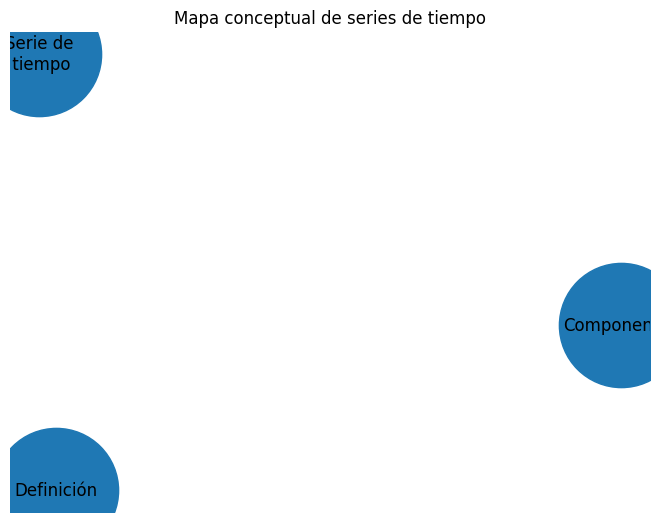

In [19]:
# Mapa conceptual
import matplotlib.pyplot as plt 
import networkx as nx 

# Crear un objeto de grafo dirigido
G = nx.DiGraph() 

#

G.add_node('Serie de\n tiempo')
G.add_node('Definición')
G.add_node('Componentes')

# Dibujar el mapa conceptual utilizando networkx y matplotlib

pos = nx.spring_layout(G, seed = 48) # con ubicaciones aleatorias fijadas
labels = {node:node for node in G.nodes()}

nx.draw(G, pos, with_labels = True, node_size = 8000)

plt.title('Mapa conceptual de series de tiempo')
plt.savefig('mapa_conceptuual_series_de_tiempo.png')
plt.show()


## Obtención y visualización de los datos de AMSC

1. Ir a la página del proyecto [AMSC]()
2. Seleccionar la variable meteorológica que quiere. 
3. Seleccionar el invervalo de tiempo 
4. Dar el correo donde quiere que le lleguen los datos como archivo .csv

In [ ]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/marco-canas/didactica_ciencia_datos/main/3_datasets/antioquia_mira_su_cielo/A2023M1_to_M9/marco_2023-09-22_20_13_29(1).csv'

df = pd.read_csv(url)

In [ ]:
df.head() 

In [ ]:
df.keys()


In [ ]:
df.temperatura

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.temperatura)

plt.savefig('/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/temperatura_yarumal_2023.jpg')




# Visualización con plotly

In [1]:
import plotly.express as px
import pandas as pd

# Lee los datos del archivo CSV
archivo_csv = "datos_temoeratura_22_sep_medellin_2023-09-23_15_39_37.csv"
df = pd.read_csv(archivo_csv)

# Asegúrate de que la columna de fecha esté en formato datetime
df['Fecha'] = pd.to_datetime(df['fecha'])

# Crea una gráfica de líneas interactiva con Plotly Express
fig = px.line(df, x='fecha', y='temperatura', title='Serie de Tiempo de Temperatura')
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Temperatura (°C)')

# Personaliza el diseño de la gráfica si es necesario
# fig.update_layout(
#     xaxis=dict(
#         showline=True,
#         showgrid=False
#     ),
#     yaxis=dict(
#         showline=True,
#         showgrid=False
#     )
# )

# Muestra la gráfica
fig.show()


## [Video de apoyo graficación con plotly](https://www.youtube.com/watch?v=pTjH21x2pSY)

## Time Series según Wes

## 11.2 Time Series Basics


A basic kind of time series object in pandas is a Series indexed by timestamps, which
is often represented external to pandas as Python strings or datetime objects:

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8),
datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts


2011-01-02   -0.554994
2011-01-05    1.134141
2011-01-07    1.614920
2011-01-08    1.055169
2011-01-10   -0.526193
2011-01-12    0.738289
dtype: float64

Under the hood, these datetime objects have been put in a DatetimeIndex:

En el fondo, estos objetos de fecha y hora se han colocado en un `DatetimeIndex`:

In [2]:
ts.index 

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Like other Series, arithmetic operations between differently indexed time series automatically align on the dates:

Al igual que otras series, las operaciones aritméticas entre diferentes series temporales de índices se alinean automáticamente en las fechas:  


In [3]:
ts + ts[::2] # sumar la serie con la serie formada por las fechas saltando de 2 en 2. 

2011-01-02   -1.109988
2011-01-05         NaN
2011-01-07    3.229840
2011-01-08         NaN
2011-01-10   -1.052386
2011-01-12         NaN
dtype: float64

Recall that `ts[::2]` selects every second element in ts.

pandas stores timestamps using NumPy’s datetime64 data type at the nanosecond resolution:

In [4]:
ts.index.dtype

dtype('<M8[ns]')

Scalar values from a DatetimeIndex are pandas Timestamp objects:

In [6]:
stamp = ts.index[0]
stamp 

Timestamp('2011-01-02 00:00:00')

A Timestamp can be substituted anywhere you would use a datetime object. Additionally, it can store frequency information (if any) and understands how to do time zone conversions and other kinds of manipulations. More on both of these things later.


# Indexing, Selection, Subsetting


Time series behaves like any other pandas.Series when you are indexing and selecting data based on label:

In [7]:
stamp = ts.index[2]
stamp 

Timestamp('2011-01-07 00:00:00')

In [8]:
ts[stamp]

1.6149200603844165

As a convenience, you can also pass a string that is interpretable as a date:

In [9]:
ts['1/10/2011']


-0.5261931842725781

In [10]:

ts['20110110']


-0.5261931842725781

For longer time series, a year or only a year and month can be passed to easily select slices of data:

In [11]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -1.272539
2000-01-02   -0.006739
2000-01-03    1.579385
2000-01-04    2.801730
2000-01-05   -0.850400
                ...   
2002-09-22   -0.349262
2002-09-23    1.120275
2002-09-24    0.445558
2002-09-25   -0.390930
2002-09-26    0.513514
Freq: D, Length: 1000, dtype: float64

In [12]:
longer_ts['2001']

2001-01-01   -2.082468
2001-01-02    1.060371
2001-01-03    1.619477
2001-01-04    0.120733
2001-01-05    0.081577
                ...   
2001-12-27   -0.004117
2001-12-28   -0.396930
2001-12-29    0.686586
2001-12-30    0.250392
2001-12-31    0.344269
Freq: D, Length: 365, dtype: float64

Here, the string '2001' is interpreted as a year and selects that time period. This also works if you specify the month:

In [13]:
longer_ts['2001-05']

2001-05-01    0.104301
2001-05-02   -0.005378
2001-05-03   -0.900487
2001-05-04    0.490793
2001-05-05    1.622355
2001-05-06   -0.228363
2001-05-07    0.101495
2001-05-08    0.673379
2001-05-09    0.984999
2001-05-10    2.122030
2001-05-11    1.495666
2001-05-12    0.914289
2001-05-13   -1.219308
2001-05-14   -1.523063
2001-05-15   -0.191159
2001-05-16    0.175986
2001-05-17   -2.179763
2001-05-18    0.024962
2001-05-19    0.270707
2001-05-20   -0.963676
2001-05-21    0.761570
2001-05-22   -0.602846
2001-05-23    1.502502
2001-05-24    0.377619
2001-05-25   -1.281141
2001-05-26   -1.735592
2001-05-27    1.109575
2001-05-28   -0.613042
2001-05-29   -1.080891
2001-05-30   -0.482138
2001-05-31   -0.223078
Freq: D, dtype: float64

Slicing with datetime objects works as well:

In [14]:
ts[datetime(2011, 1, 7):]

2011-01-07    1.614920
2011-01-08    1.055169
2011-01-10   -0.526193
2011-01-12    0.738289
dtype: float64

Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query:

In [15]:
ts 

2011-01-02   -0.554994
2011-01-05    1.134141
2011-01-07    1.614920
2011-01-08    1.055169
2011-01-10   -0.526193
2011-01-12    0.738289
dtype: float64

In [16]:
ts['1/6/2011':'1/11/2011']

2011-01-07    1.614920
2011-01-08    1.055169
2011-01-10   -0.526193
dtype: float64

# Máquinas de soporte vectorial según Geron


# Chapter 5. Support Vector Machines (Página 219)

### [Video de apoyo]()


A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection.   

Una máquina de vectores de soporte (SVM) es un modelo de aprendizaje automático potente y versátil, capaz de realizar clasificación, regresión e incluso detección de valores atípicos lineales o no lineales.

It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox.   

Es uno de los modelos más populares de Machine Learning y cualquier persona interesada en Machine Learning debería tenerlo en su caja de herramientas.

SVMs are particularly well suited for classification of complex small- or medium-sized datasets.

Las SVM son particularmente adecuadas para la clasificación de conjuntos de datos complejos de tamaño pequeño o mediano.

This chapter will explain the core concepts of SVMs, how to use them, and how they work.  

Este capítulo explicará los conceptos básicos de las SVM, cómo usarlas y cómo funcionan.  


# Linear SVM Classification


The fundamental idea behind SVMs is best explained with some pictures. 

Figure 5-1 shows
part of the iris dataset that was introduced at the end of Chapter 4. 

The two classes can clearly be separated easily with a straight line (they are linearly separable). The left plot shows the decision boundaries of three possible linear classifiers. 

Las dos clases claramente se pueden separar fácilmente con una línea recta (son linealmente separables). El gráfico de la izquierda muestra los límites de decisión de tres posibles clasificadores lineales.

The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly. 

The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances.   

Los otros dos modelos funcionan perfectamente en este conjunto de entrenamiento, pero sus límites de decisión se acercan tanto a las instancias que estos modelos probablemente no funcionarán tan bien en instancias nuevas.

In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classifier; this line not only separates the two classes but also stays as far away from the closest training instances as possible. 

You can
think of an SVM classifier as fitting the widest possible street (represented by the parallel
dashed lines) between the classes. This is called large margin classification.


# Linear SVM Classification



The book starts with a few figures, before the first code example, so the next three cells generate and save these figures. You can skip them if you want.  

El libro comienza con algunas cifras, antes del primer ejemplo de código, por lo que las siguientes tres celdas generan y guardan estas cifras. Puedes omitirlos si quieres.


The fundamental idea behind SVMs is best explained with some pictures. Figure 5-1 shows
part of the iris dataset that was introduced at the end of Chapter 4.   

La idea fundamental detrás de las SVM se explica mejor con algunas imágenes. La Figura 5-1 muestra parte del conjunto de datos del iris que se presentó al final del Capítulo 4.

The two classes can clearly be separated easily with a straight line (they are linearly separable). The left plot shows the decision boundaries of three possible linear classifiers. 

Las dos clases claramente se pueden separar fácilmente con una línea recta (son linealmente separables). El gráfico de la izquierda muestra los límites de decisión de tres posibles clasificadores lineales.

The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly.   

El modelo cuyo límite de decisión está representado por la línea discontinua es tan malo que ni siquiera separa las clases adecuadamente.

The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances. 

In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classifier; this line not only separates the two classes but also stays as far away from the closest training instances as possible.   

Por el contrario, la línea continua en el gráfico de la derecha representa el límite de decisión de un clasificador SVM; esta línea no sólo separa las dos clases sino que también se mantiene lo más alejada posible de las instancias de entrenamiento más cercanas posible.

You can think of an SVM classifier as fitting the widest possible street (represented by the parallel
dashed lines) between the classes. This is called large margin classification.  

Puede pensar que un clasificador SVM se ajusta a la calle más ancha posible (representada por líneas discontinuas paralelas) entre las clases. A esto se le llama clasificación de gran margen.

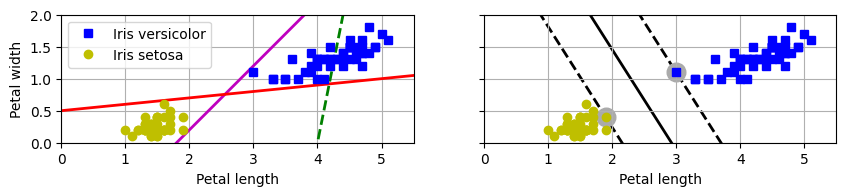

In [2]:

# extra code – this cell generates and saves Figure 5–1
# https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=10.0)
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.savefig("/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/clasificacion_alto_margen.jpg")
plt.show()



# Referencias

* Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".

* [McKinney, W. (2022). Python for data analysis. " O'Reilly Media, Inc.".](https://d1wqtxts1xzle7.cloudfront.net/62139307/Python-for-Data-Analysis-2nd-Edition20200219-40214-1of6b7q-libre.pdf?1582110463=&response-content-disposition=inline%3B+filename%3DPython_for_Data_Analysis.pdf&Expires=1694149999&Signature=MH1uVxkUnFgwepQUeb-3OdFgQWj0vmtzC4ra~TZ-xyCstLSCg7uaNeDi4yrXghoJ6UEMCGOJkx2s13vayVVP-IzF8I91v6TeW0ZUeIejbWlrkHxtT01V-fJ6q7C~9buozUwVr~o2BY3llLH5rZVlZF31pPefEm3ejjlW8pO~prbQ8VVfyfXs4HzSIQJ~nbTCZU8LfqYwU3yMLV7IH4TQN9eGd8GZuqHjznUJZU995AwYqQqzl5-Xtoz93-S1Pn2UWuS8SsXmFt1ysr~-M7-6lVQw~E9~MFbdCIQRfp~fRtVtHDfB-mEXNEQ1CX518xUB0xT3JtfZdsGArib9UMwOqg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)

<img src = 'https://wesmckinney.com/images/wes-2017-01-12-small.png' width = 200>

* [Documentación de la función nx.spring_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html)

* [Cuaderno Jupyter sobre Máquinas de soporte vectorial de Geron](https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb)